##  Analysis and Classification of Wine Quality 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

### Red Wine Dataset

In [2]:
path = "E:\priyankaP\Project\wine-quality\wineQualityReds.csv"
df_red = pd.read_csv(path)
df_red.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_red.drop("Unnamed: 0", axis = 1, inplace = True)
df_red.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### White Wine dataset

In [4]:
path1 = "E:\priyankaP\Project\wine-quality\wineQualityWhites.csv"
df_white = pd.read_csv(path1)
df_white.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df_white.drop("Unnamed: 0", axis = 1, inplace = True)
df_white.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df_merge = pd.concat([df_red,df_white],axis=0)
df_merge.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_merge.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

 #### There are no missing values in this dataset.

In [8]:
df_merge.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


## Let's do a count plot to visualize the above data



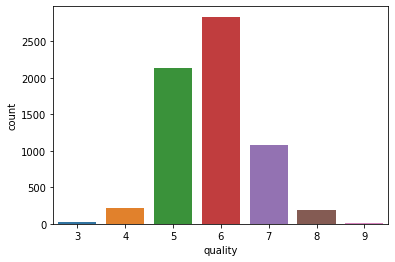

In [10]:
sns.countplot(x='quality', data=df_merge)

#### There 6 wine quality values based from the results above. Minimum is 3 and maximum is 9. We can create 3 wine quality categories namely poor quality, normal quality, excellent quality.

if quality < 6 - poor quality

if quality = 6 - normal quality

if quality > 6 - excellent quality

In [11]:
def classify_wine_quality(quality):
    if quality < 6:
        return 'poor quality'
    elif quality == 6:
        return 'normal quality'
    else:
        return 'excellent quality'
    
df_merge['quality classification'] = df_merge['quality'].apply(classify_wine_quality)


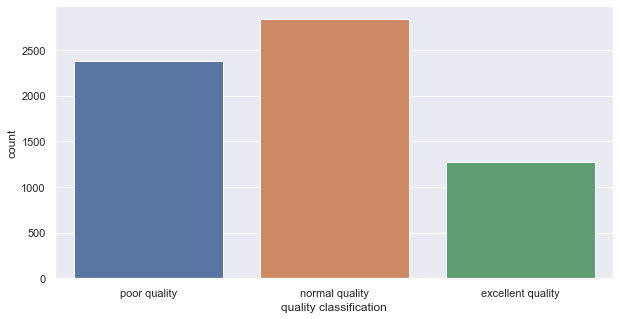

In [12]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='quality classification', data=df_merge)

## Let's do some plotting to know how the data columns are distributed in the dataset

<function matplotlib.pyplot.show(*args, **kw)>

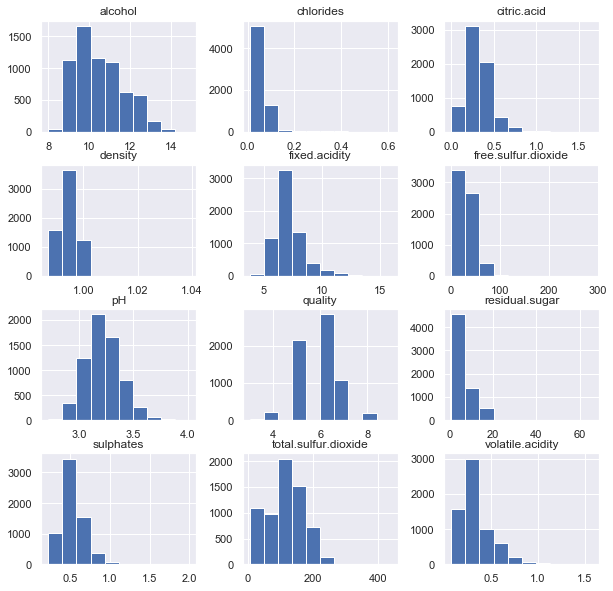

In [13]:
df_merge.hist(bins=10, figsize=(10,10))
plt.show

## Correlation Heat Maps - Seaborn

### Red Wine

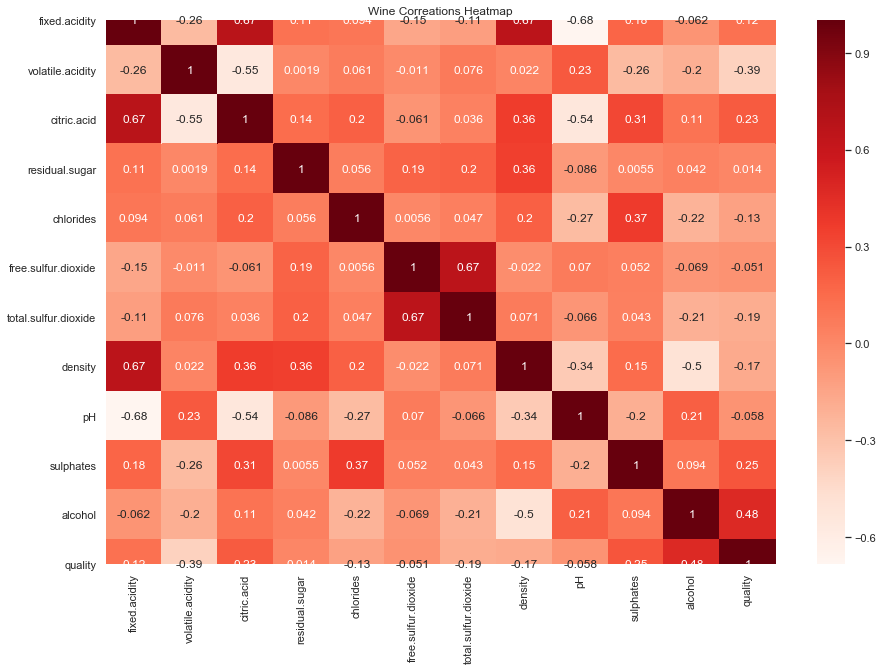

In [14]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Wine Correations Heatmap")
correlation = df_red.corr()
sns.heatmap(correlation,cbar = True, annot = True, ax = ax, cmap = "Reds")
plt.show()

### White Wine

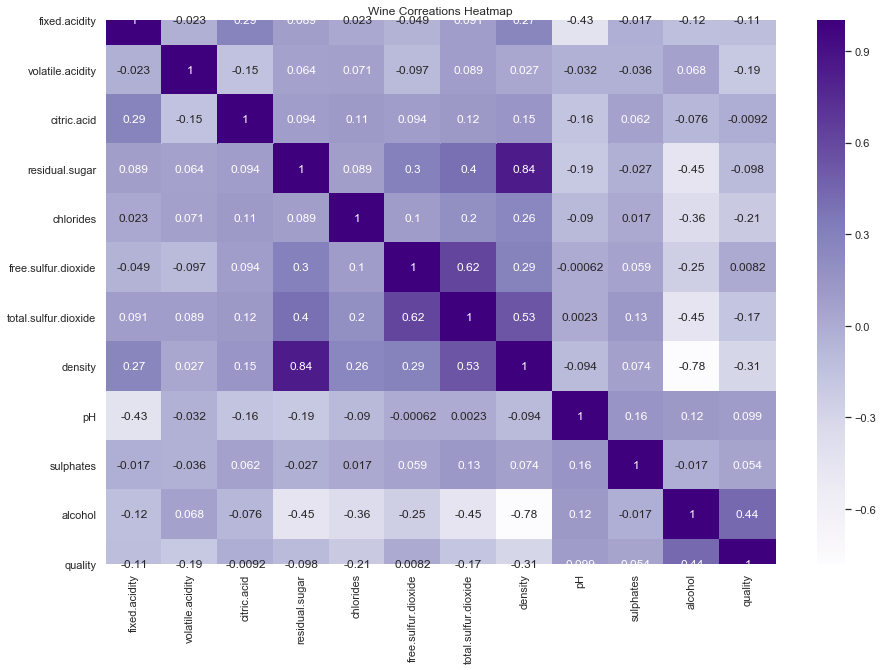

In [15]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Wine Correations Heatmap")
correlation = df_white.corr()
sns.heatmap(correlation,cbar = True, annot = True, ax = ax, cmap = "Purples")
plt.show()

### Red Correlation - White Correlation
There are some noteable differences in the way that certain variables interact depending on the variety of wine. The darker the square, the larger the difference that interaction is between Red and White wines.

In [16]:
df_red_corr = df_red.corr()
df_white_corr = df_white.corr()

In [17]:
df_red_corr

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile.acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric.acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual.sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free.sulfur.dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total.sulfur.dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
df_white_corr


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile.acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric.acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual.sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free.sulfur.dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total.sulfur.dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [19]:
diff_corr = df_red_corr - df_white_corr

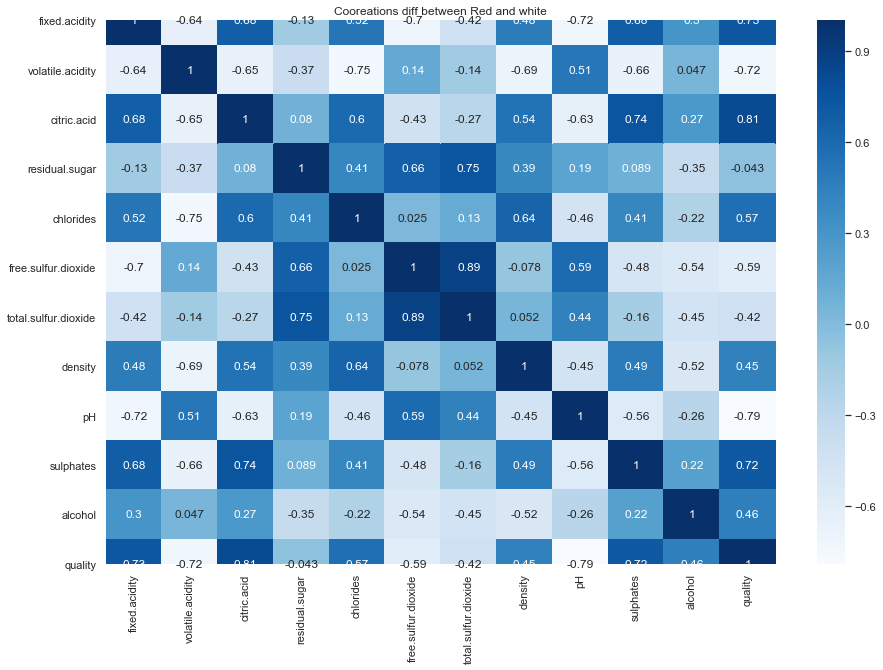

In [20]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Cooreations diff between Red and white")
corr = diff_corr.corr()
sns.heatmap(corr,cbar =True, annot = True, cmap = "Blues")
plt.show()

### Preprocessing Data for performing Machine learning algorithms¶


In [21]:
df_merge.columns

Index(['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality classification'],
      dtype='object')

In [22]:
X = df_merge[['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
       [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
       [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [23]:
y = df_merge['quality'].values
y[0:5]

array([5, 5, 5, 6, 5], dtype=int64)

In [24]:
df_merge.shape

(6497, 13)

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5197, 11) (5197,)
Test set: (1300, 11) (1300,)


### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver = 'liblinear')
LR.fit(X_train,y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
from sklearn.metrics import jaccard_similarity_score
yhat = LR.predict(X_test)
jaccard_similarity_score(y_test,yhat)

E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5284615384615384

### Random Forest Classifier 

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
Rand = RandomForestClassifier(n_estimators=100)
Rand.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = Rand.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.6938461538461539

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[  0   0   3   2   0   0   0]
 [  0   8  19  14   1   0   0]
 [  0   3 320 112   5   0   0]
 [  0   0  91 438  37   0   0]
 [  0   0   5  79 121   0   0]
 [  0   0   0  13  13  15   0]
 [  0   0   1   0   0   0   0]]


### Support Vector Classifier

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
svc =SVC(kernel='rbf')
svc.fit(X_train,y_train)

E:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
y_pre = svc.predict(X_test)
metrics.accuracy_score(y_test,y_pre)

0.5646153846153846

In [35]:
print(confusion_matrix(y_test, y_pre))

[[  0   0   2   3   0   0   0]
 [  0   0  25  16   1   0   0]
 [  0   0 280 159   1   0   0]
 [  0   0 136 412  18   0   0]
 [  0   0   5 158  42   0   0]
 [  0   0   0  28  13   0   0]
 [  0   0   0   1   0   0   0]]


### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy")
dTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
dTree.fit(X_train,y_train)
pTree = dTree.predict(X_test)
metrics.accuracy_score(y_test,pTree)

0.6192307692307693

In [38]:
print(confusion_matrix(y_test, pTree))

[[  1   2   2   0   0   0   0]
 [  0  11  18  12   0   1   0]
 [  2  20 285 112  18   3   0]
 [  2  13 113 362  66   9   1]
 [  0   1  13  57 129   5   0]
 [  0   0   0  13  11  17   0]
 [  0   1   0   0   0   0   0]]


In [39]:
rfc_eval = cross_val_score(estimator = Rand, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.6760183993897793

### KNN¶

In [40]:
from sklearn.neighbors import KNeighborsClassifier
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [41]:
yhat = neigh.predict(X_test)

In [42]:
metrics.accuracy_score(y_test,yhat)

0.57

In [43]:
print(confusion_matrix(y_test, yhat))

[[  1   1   2   1   0   0   0]
 [  0   1  23  16   2   0   0]
 [  1   1 299 123  16   0   0]
 [  0   2 159 357  46   2   0]
 [  0   1  20  93  82   9   0]
 [  0   0   3  17  20   1   0]
 [  0   0   0   1   0   0   0]]


### Summary

Logistic Regression : 52%

Random Forest Classifier : 69%

Support Vector Classifier : 56%

Decision Tree : 61%

KNN : 57%

Cross Validation Score for Random Forest : 68%